### In this notebook we understand the implementation of forward hooks to get output activations from intermediate layers

### 1. Import libraries

In [30]:
import torch
from torch import nn
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from collections import OrderedDict
import matplotlib.pyplot as plt

### 2. Create model

In [35]:
model = nn.Sequential(OrderedDict([('fc1',nn.Linear(256,128)),
                       ('sigmoid', nn.Sigmoid()),
                       ('fc2', nn.Linear(128,5)),
                       ('softmax',nn.Softmax(dim=1))]))
#define intput
x = torch.rand(1, 256)



### 3. Define hooks

In [36]:
activations = {} #this will store the outputs of layers

### This function returns the activations
def get_activation(name): #name -> layer name. As we cannot send name to activation_hook directly we create an abstraciton to send name
    def activation_hook(inst, inp, out):
        """Run activation hook.
        Parameters
        ----------
        inst : torch.nn.Module
            The layer we want to attach the hook to.
        inp : tuple of torch.Tensor
            The input to the `forward` method.
        out : torch.Tensor
            The output of the `forward` method.
        """
        activations[name] = out.data
    return activation_hook





#### 3.1 Method 1: Get layer by name

In [37]:
model

Sequential(
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=128, out_features=5, bias=True)
  (softmax): Softmax(dim=1)
)

In [38]:
#Register forward hooks for the layers required
model.fc1.register_forward_hook(get_activation('fc1'))
model.sigmoid.register_forward_hook(get_activation('sigmoid'))
model.fc2.register_forward_hook(get_activation('fc2'))
model.softmax.register_forward_hook(get_activation('softmax'))

y = model(x)

In [39]:
for name, outputs in activations.items():
    print(name,' : ', outputs.shape)
print('\nsoftmax output: ', activations['softmax'])

fc1  :  torch.Size([1, 128])
sigmoid  :  torch.Size([1, 128])
fc2  :  torch.Size([1, 5])
softmax  :  torch.Size([1, 5])

softmax output:  tensor([[0.2880, 0.1523, 0.1777, 0.1822, 0.1998]])


In [40]:
print(y.data)

tensor([[0.2880, 0.1523, 0.1777, 0.1822, 0.1998]])


> We can see above that the forward hook for softmax returns the same values as output from the model

#### 3.2 Method 2: Get all layers by using model.named_modules()
We can get name and the layers using named_modules()

In [41]:
for name, module in model.named_modules():
    print(name, ':', module)

 : Sequential(
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=128, out_features=5, bias=True)
  (softmax): Softmax(dim=1)
)
fc1 : Linear(in_features=256, out_features=128, bias=True)
sigmoid : Sigmoid()
fc2 : Linear(in_features=128, out_features=5, bias=True)
softmax : Softmax(dim=1)


In [42]:
activations = {} #this will store the outputs of layers
#register forward hooks
for name, layer in model.named_modules():
    layer.register_forward_hook(get_activation(name))


y = model(x)

In [43]:
for name, outputs in activations.items():
    print(name,' : ', outputs.shape)
print('\nsoftmax output: ', activations['softmax'])

fc1  :  torch.Size([1, 128])
sigmoid  :  torch.Size([1, 128])
fc2  :  torch.Size([1, 5])
softmax  :  torch.Size([1, 5])
  :  torch.Size([1, 5])

softmax output:  tensor([[0.2880, 0.1523, 0.1777, 0.1822, 0.1998]])


In [44]:
activations

{'fc1': tensor([[ 0.3277,  0.1293, -0.4970, -0.3330, -0.3032, -0.2126,  0.0152, -0.2876,
           0.7523,  0.1182,  0.0701, -0.5513, -0.3919, -0.5075,  0.1372,  0.3716,
           0.1022, -0.3929,  0.1653,  0.1895,  0.2789, -0.4470, -0.3832, -0.3496,
           0.3696,  0.3223,  0.0565,  0.1740, -0.0396, -0.5457,  0.0604, -0.5024,
          -0.2981, -0.1850,  0.3374,  0.6263,  0.1753,  0.5658, -0.3108, -0.3544,
          -0.1556, -0.1320, -0.1208,  0.1302,  0.4653,  0.5090,  0.1038,  0.5372,
          -0.8012,  0.2552,  0.4714,  0.1259,  0.1132,  0.1752, -0.0797, -0.1166,
           0.1636, -0.3411, -0.1170,  0.2372,  0.0247, -0.2229,  0.4604,  0.0673,
          -0.1864, -0.2419, -0.1466,  0.4694,  0.1581,  0.5005,  0.2097, -0.5272,
          -0.5777,  0.0914, -0.0466,  0.2129, -0.1508,  0.1266, -0.4131,  0.3833,
           0.1602,  0.0055, -0.2538,  0.3353,  0.1259,  0.3631, -0.1781,  0.1397,
           0.4234,  0.1705,  0.4128,  0.1568, -0.5319, -0.2692, -0.2828, -0.2603,
         

In [23]:
y.data

tensor([[0.1325, 0.2931, 0.2387, 0.1624, 0.1733]])

### 4. Visualize the activation histogram

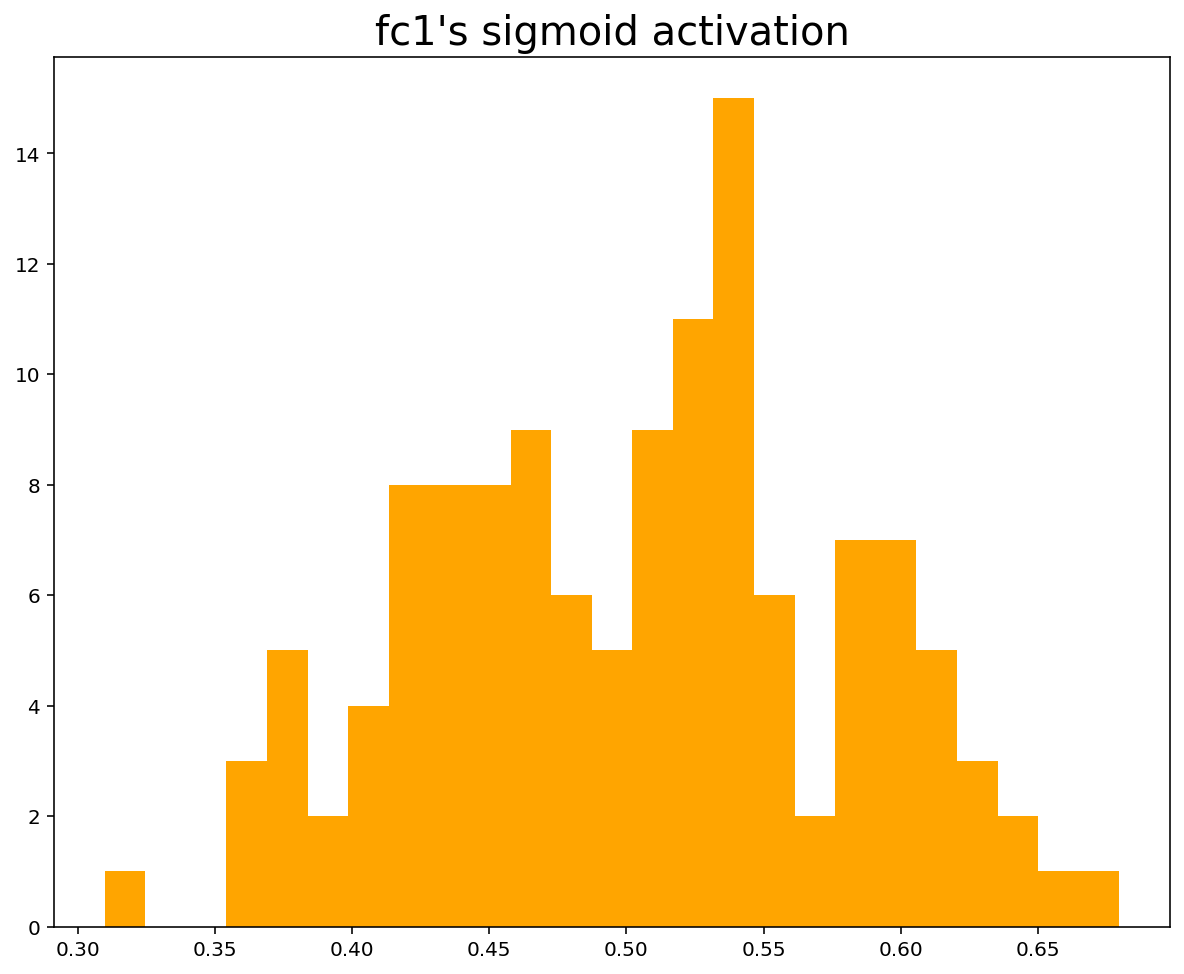

In [61]:
plt.figure(figsize=(10,8))
_=plt.hist(activations['sigmoid'].numpy()[0], bins=25, color = 'orange')
_=plt.title("fc1's sigmoid activation", fontsize=20)